In [1]:
# go through all modules and delete unnecessary code
# optimise used code in modules
# check whether figures are exactly reproduced by the saved results
# check whether a simple RF experiment can reproduce paper results
# design readme file and embedd figures
# link to the paper in readme file
# give instructions/code/functions on how to easily use sort and slice in other projects
# create sort and slice featuriser

# remove inconsistencies w.r.t. chi2 and filtered, sorted and sort_and_slice (with experimental results and visualisation code etc)

In [2]:
def construct_sort_and_slice_ecfp_featuriser(mols_train, 
                                             max_radius = 2, 
                                             atom_inv_type = "ecfp", 
                                             use_bond_invs = True, 
                                             use_chirality = False, 
                                             use_counts = False, 
                                             fp_dimension = 1024):
    """
    Creates a function "ecfp_featuriser" that maps RDKit mol objects to vectorial ECFP fingerprints pooled via Sort & Slice (instead of traditional hash-based folding for substructure pooling).
    See also "Sort & Slice: A Simple and Superior Alternative to Hash-Based Folding for Extended-Connectivity Fingerprints" by Dablander, Hanser, Lambiotte and Morris (2024): https://arxiv.org/abs/2403.17954.
    
    INPUTS:
    
    - mols_train (list)     ...    A list of RDKit mol objects [mol_1, mol_2, ...] that are used as the training set to construct the Sort & Slice substructure pooling operator.
    - max_radius (int)      ...    The maximal radius up to which to generate the hashed integer ECFP-substructure identifiers. Common choices are 1, 2 or 3 (corresponding to diameters of 2, 4, or 6).
    - atom_inv_type (str)   ...    The type of initial atomic invariants with which to generate the hashed integer ECFP-substructure identifiers ("ecfp" for standard or "fcfp" for pharmacophoric invariants).
    - use_bond_invs (bool)  ...    Whether or not to take into account bond invariants when generating the hashed integer ECFP-substructure identifiers (default = True).
    - use_chirality (bool)  ...    Whether or not to take into account chirality when generating the hashed integer ECFP-substructure identifiers (default = False).
    - use_counts (bool)     ...    Whether to generate binary vectorial fingerprints (use_counts = False) that indicate the mere presence or absence of a substructure, or integer fingerprints (use_counts = True) that additionally indicate how many times a substructure is found in the input compound.
    - fp_dimension (int)    ...    Length of the vectorial Sort & Slice ECFP. Common choices are 512, 1024, 2048 and 4096. Only the fp_dimension most prevalent ECFP-substructures in mols_train are included in the final vector representation.
    
    OUTPUT:
    
    - ecfp_featuriser (function)    ...    A function that maps RDKit mol objects to vectorial ECFP fingerprints pooled via a Sort & Slice operator trained on mols_train.
    
    EXAMPLE:
    
    First construct a molecular featurisation function with desired settings via
    
    ecfp_featuriser = construct_sort_and_slice_ecfp_featuriser(mols_train = [mol_1, mol_2, ...], 
                                                               max_radius = 2, 
                                                               atom_inv_type = "ecfp", 
                                                               use_bond_invs = True, 
                                                               use_chirality = False, 
                                                               use_counts = False, 
                                                               fp_dimension = 1024)
                                                               
    Note that the ECFP settings (max_radius, atom_inv_type, use_bond_invs, use_chirality, use_counts, fp_dimension) and information from mols_train are all by construction implicitly transferred to "ecfp_featuriser".
    
    Now let mol be an RDKit mol object. 
    
    Then ecfp_featuriser(mol) = np.array([1, 0, 0, ..., 1, 1, 0]) is a 1-dimensional numpy array of length "fp_dimension" representing the vectorial Sort & Slice ECFP fingerprint for mol.
    
    The fingerprint ecfp_featuriser(mol) is generated by (i) first generating the (multi)set of hashed integer ECFP-substructure identifiers from mol and then (ii) vectorising it via the Sort & Slice operator trained on mols_train (rather than via classical hash-based folding).
    """
    
    
    
    
    ecfp_featuriser = 0
    
    return ecfp_featuriser

# Import Packages

In [5]:
# import general packages and set general options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
import warnings
warnings.filterwarnings("ignore")

# import custom code written for this project
from modules import *

# import and check funtionality of pytorch
import torch
print("Pytorch version = ", torch.__version__)
print("CUDA version = ", torch.version.cuda)
print("CUDA available = ", torch.cuda.is_available())
print("Random Pytorch test tensor = ", torch.rand(1))

Pytorch version =  1.10.2+cu113
CUDA version =  11.3
CUDA available =  False
Random Pytorch test tensor =  tensor([0.9496])


# Load and Prepare Data

In [6]:
# initialise dictionary used to store experimental settings, after dictionary is initialised, choose one of the five data sets below to proceed

settings_dict = {}

In [7]:
# LIT-PCBA Estrogen Receptor Alpha Antagonism

settings_dict["dataset_name"] = "lit_pcba_esr_ant"
settings_dict["task_type"] = "classification"
settings_dict["prop_name"] = "Activity"

In [7]:
# MoleculeNet Lipophilicity

settings_dict["dataset_name"] = "moleculenet_lipophilicity"
settings_dict["task_type"] = "regression"
settings_dict["prop_name"] = "exp"

In [7]:
# AqSolDB solubility

settings_dict["dataset_name"] = "aqsoldb_solubility"
settings_dict["task_type"] = "regression"
settings_dict["prop_name"] = "Solubility"

In [3]:
# PostEra SARS-CoV-2 Mpro inhibition

settings_dict["dataset_name"] = "postera_sars_cov_2_mpro"
settings_dict["task_type"] = "regression"
settings_dict["prop_name"] = "f_avg_IC50"

In [33]:
# Ames mutagenicity

settings_dict["dataset_name"] = "ames_mutagenicity"
settings_dict["task_type"] = "classification"
settings_dict["prop_name"] = "Activity"

In [8]:
# load clean data

dataframe = pd.read_csv("data/" + settings_dict["dataset_name"] + "/" + "clean_data.csv", sep = ",")
display(dataframe)

,SMILES,exp
0,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,3.54
1,COc1cc(OC)c(S(=O)(=O)N2c3ccccc3CCC2C)cc1NC(=O)...,-1.18
2,COC(=O)[C@H](c1ccccc1Cl)N1CCc2c(ccs2)C1,3.69
3,O=C(NC1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2c([nH...,3.37
4,Cc1cccc(C[C@H](NC(=O)c2cc(C(C)(C)C)nn2C)C(=O)N...,3.10
...,...,...
4195,O=C(Nc1ccc(CCO)cc1)c1cc2cc(Cl)ccc2[nH]1,3.85
4196,CCN(C(=O)Cc1ccc(S(C)(=O)=O)cc1)C1CCN(CCC(c2ccc...,3.21
4197,COc1cccc2c1cn[nH]2,2.10
4198,O=C(NCC1CCCCC1)c1c2cccnc2ccc1Cl,2.65


Mean Value (Target) =  2.1863357142857143
Standard Deviation (Target) =  1.2028604901336188
Maximum Value (Target) =  4.5
Minimum Value (Target) =  -1.5 

Shape of y =  (4200,)

 y =  [ 3.54 -1.18  3.69 ...  2.1   2.65  2.7 ]


(array([ 53., 109., 165., 306., 468., 651., 799., 853., 586., 210.]),
 array([-1.5, -0.9, -0.3,  0.3,  0.9,  1.5,  2.1,  2.7,  3.3,  3.9,  4.5]),
 <BarContainer object of 10 artists>)

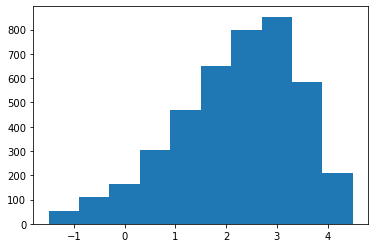

In [9]:
# construct target variable y (for the SARS-CoV-2 main protease data set, we convert Ki to pKi by taking negative decadic logarithm)

if settings_dict["dataset_name"] == "postera_sars_cov_2_mpro":
    y = -np.log10(dataframe.loc[:, settings_dict["prop_name"]].values.astype(float))
else:
    y = dataframe.loc[:, settings_dict["prop_name"]].values.astype(float)

print("Mean Value (Target) = ", np.mean(y))
print("Standard Deviation (Target) = ", np.std(y))
print("Maximum Value (Target) = ", np.amax(y))
print("Minimum Value (Target) = ", np.amin(y), "\n")

print("Shape of y = ", y.shape)
print("\n y = ", y)

plt.hist(y)

Shape of x_smiles =  (4200,)
Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21


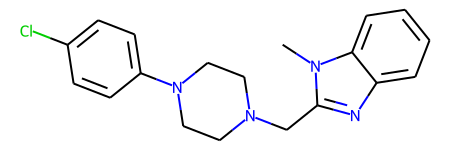

In [10]:
# extract SMILES strings

x_smiles = np.reshape(dataframe["SMILES"].values, (len(dataframe), 1))[:,0]

print("Shape of x_smiles = ", x_smiles.shape)
print(x_smiles[0])
display(Chem.MolFromSmiles(x_smiles[0]))

In [11]:
# create dictionary that maps smiles strings to their target values

x_smiles_to_y_dict = dict(list(zip(x_smiles, y)))

# Prepare Data Split

In [12]:
# choose settings for dictionary that contains indices for data splits

settings_dict["split_type"] = "rand" # choose "rand" for random split and "scaff" for scaffold split
settings_dict["split_type_rand_stratified"] = False # given a random split and a classification problem, choose whether to stratify the split
settings_dict["k_splits"] = 2 # choose number of cross validation folds k_splits
settings_dict["m_reps"] = 3 # choose number of random seeds m_reps with which the cross validation scheme is repeated
settings_dict["random_state_cv"] = 42 # choose random state

In [13]:
# construct dictionary that contains indices for data splits

if settings_dict["split_type"] == "rand" and settings_dict["split_type_rand_stratified"] == False:
    
    data_split_dict = create_data_split_dict_random(x_smiles = x_smiles,
                                                    k_splits = settings_dict["k_splits"],
                                                    m_reps = settings_dict["m_reps"],
                                                    random_state_cv = settings_dict["random_state_cv"])

elif settings_dict["split_type"] == "rand" and settings_dict["split_type_rand_stratified"] == True:
    
    data_split_dict = create_data_split_dict_random_strat(x_smiles = x_smiles,
                                                          y = y,
                                                          k_splits = settings_dict["k_splits"],
                                                          m_reps = settings_dict["m_reps"],
                                                          random_state_cv = settings_dict["random_state_cv"])
    
elif settings_dict["split_type"] == "scaff":
    
    data_split_dict = create_data_split_dict_scaffold(x_smiles = x_smiles,
                                                      k_splits = settings_dict["k_splits"],
                                                      m_reps = settings_dict["m_reps"],
                                                      scaffold_func = "Bemis_Murcko_generic",
                                                      random_state_cv = settings_dict["random_state_cv"])

# Evaluate Models

In [14]:
# choose ECFP hyperparameters

settings_dict["ecfp_settings"] = {"mol_to_invs_function": ecfp_invariants, # ecfp_invariants or fcfp_invariants
                                  "radius": 2, # 0 or 1 or 2 or 3 ...
                                  "pool_method": "sort_and_slice", # "hashed" or "sort_and_slice" or "filtered" or "mim"
                                  "dimension": 1024, # 256 or 512 or 1024 or 2048 or 4096 ...
                                  "use_bond_invs": True, # True or False
                                  "use_chirality": True, # True or False
                                  "use_counts": False} # True or False

In [15]:
# chose ml model: random forest or multilayer perceptron

settings_dict["ml_model"] = "rf" # "rf" or "mlp"

In [16]:
# choose rf hyperparameters

settings_dict["rf_settings"] = {"n_estimators" : 100,
                                "max_depth" : None,
                                "min_samples_leaf" : 1,
                                "min_samples_split" : 2,
                                "bootstrap" : True,
                                "max_features": "sqrt",
                                "random_state" : 42}

if settings_dict["task_type"] == "regression":

    settings_dict["rf_settings"]["criterion"] = "squared_error"

elif settings_dict["task_type"] == "classification":

    settings_dict["rf_settings"]["criterion"] = "gini"

In [29]:
# choose mlp hyperparameters

settings_dict["mlp_settings"] = {"architecture" : list(arch(settings_dict["ecfp_settings"]["dimension"], 1, 512, 5)),
                                "hidden_activation" : nn.ReLU(),
                                "use_bias" : True,
                                "hidden_dropout_rate" : 0.25,
                                "hidden_batchnorm" : True,
                                "batch_size" : 64,
                                "dataloader_shuffle" : True,
                                "dataloader_drop_last" : True,
                                "learning_rate" : 1e-3,
                                "lr_lambda" : lambda epoch: max(0.98**epoch, 1e-2),
                                "lr_last_epoch": 0,
                                "weight_decay" : 0.1,
                                "num_epochs" : 0,
                                "optimiser" : torch.optim.AdamW,
                                "print_results_per_epochs" : None}

if settings_dict["task_type"] == "regression":

    settings_dict["mlp_settings"]["output_activation"] = nn.Identity()
    settings_dict["mlp_settings"]["loss_function"] = nn.MSELoss()
    settings_dict["mlp_settings"]["performance_metrics"] = "regression"

elif settings_dict["task_type"] == "classification":

    settings_dict["mlp_settings"]["output_activation"] = nn.Sigmoid()
    settings_dict["mlp_settings"]["loss_function"] = nn.BCELoss()
    settings_dict["mlp_settings"]["performance_metrics"] = "classification"

In [30]:
%%time
# run model and save results

# dictionary to save results over the k_splits-fold cross validation with m_reps random seeds
scores_dict = {}

# ind_train and ind_test contain the indices for the data split corresponding to the k-th fold with the m-th random seed
for ((m, k), (ind_train, ind_test)) in data_split_dict.items():
    
    # create ecfp featuriser
    featuriser = create_ecfp_featuriser(ecfp_settings = settings_dict["ecfp_settings"], 
                                        x_smiles_train = x_smiles[ind_train], 
                                        y_train = y[ind_train], 
                                        discretise_y = True if settings_dict["task_type"] == "regression" else False,
                                        base = 2, 
                                        random_state = 42)
    
    # create ecfp-based feature matrices
    X_train = featuriser(x_smiles[ind_train])
    X_test = featuriser(x_smiles[ind_test])

    # create ml model + train ml model + make predictions on test set
    if settings_dict["ml_model"] == "rf":
        
        rf_model = create_rf_model(settings_dict["rf_settings"], settings_dict["task_type"])
        rf_model.fit(X_train, y[ind_train])
        y_test_pred = make_rf_prediction(rf_model, X_test, settings_dict["task_type"])
        
    if settings_dict["ml_model"] == "mlp":
        
        mlp_model = create_mlp_model(settings_dict["mlp_settings"])
        (loss_curve_train, loss_curve_test) = train_mlp_model(mlp_model, settings_dict["mlp_settings"], X_train, y[ind_train], X_test, y[ind_test])
        plt.plot(loss_curve_train)
        plt.plot(loss_curve_test)
        y_test_pred = make_mlp_prediction(mlp_model, X_test)
        
    # record scores
    print(m, k)
    if settings_dict["task_type"] == "regression":
        scores_dict[(m, k)] = regression_scores(y[ind_test], y_test_pred, display_results = True)
    elif settings_dict["task_type"] == "classification":
        scores_dict[(m, k)] = binary_classification_scores(y[ind_test], y_test_pred, display_results = True)
        
# summarise, display and save scores for this experiment
summarise_display_and_save_results_and_settings(scores_dict, settings_dict, display_results = True)

Number of unique substructures in molecular data set =  11562
0 0


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.668389,0.53005,0.866881,3.4247,0.751484,0.697437,0.47836,2100.0


Number of unique substructures in molecular data set =  11685
0 1


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.66894,0.51995,0.870142,3.386,0.757148,0.704298,0.478951,2100.0


Number of unique substructures in molecular data set =  11811
1 0


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.657573,0.5345,0.846401,3.5196,0.716394,0.704937,0.485214,2100.0


Number of unique substructures in molecular data set =  11563
1 1


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.670416,0.52815,0.870084,3.283,0.757046,0.71747,0.495755,2100.0


Number of unique substructures in molecular data set =  11834
2 0


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.672057,0.5334,0.871791,3.63522,0.76002,0.699989,0.477509,2100.0


Number of unique substructures in molecular data set =  11537
2 1


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.677571,0.53965,0.874103,3.2755,0.764056,0.692624,0.469083,2100.0


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",0.668389,0.530050,0.866881,3.42470,0.751484,0.697437,0.478360,2100.0
"(0, 1)",0.668940,0.519950,0.870142,3.38600,0.757148,0.704298,0.478951,2100.0
"(1, 0)",0.657573,0.534500,0.846401,3.51960,0.716394,0.704937,0.485214,2100.0
"(1, 1)",0.670416,0.528150,0.870084,3.28300,0.757046,0.717470,0.495755,2100.0
"(2, 0)",0.672057,0.533400,0.871791,3.63522,0.760020,0.699989,0.477509,2100.0
"(2, 1)",0.677571,0.539650,0.874103,3.27550,0.764056,0.692624,0.469083,2100.0
mean,0.669158,0.530950,0.866567,3.42067,0.751025,0.702792,0.480812,2100.0
std,0.005995,0.006109,0.009274,0.12719,0.015937,0.007770,0.008171,0.0


CPU times: user 32.1 s, sys: 99.2 ms, total: 32.2 s
Wall time: 32.2 s


In [ ]:
%%time
# run full battery of experiments for one data set and data splitting type with both rfs and mlps

# first clear folder from previous experimental results
delete_all_files_in_folder("results/" + settings_dict["dataset_name"] + "/" + settings_dict["split_type"] + "/")

for pool_method in ["hashed", "filtered", "mim", "sort_and_slice"]:
    for dimension in [512, 1024, 2048, 4096]:
        for inv_func in [ecfp_invariants, fcfp_invariants]:
            for radius in [1, 2, 3]:

                print("pool_method = ", pool_method)
                print("dimension = ", dimension)
                print("inv_func = ", inv_func)
                print("radius = ", radius, "\n")

                # choose ECFP hyperparameters
                settings_dict["ecfp_settings"] = {"mol_to_invs_function": inv_func,
                                                  "radius": radius,
                                                  "pool_method": pool_method,
                                                  "dimension": dimension,
                                                  "use_bond_invs": True,
                                                  "use_chirality": True,
                                                  "use_counts": False}

                # run rf- and mlp models and save results
                scores_dict_rf = {}
                scores_dict_mlp = {}

                # ind_train and ind_test contain the indices for the data split corresponding to the k-th fold with the m-th random seed
                for ((m, k), (ind_train, ind_test)) in data_split_dict.items():
                    
                    # create ecfp featuriser
                    featuriser = create_ecfp_featuriser(ecfp_settings = settings_dict["ecfp_settings"], 
                                                        x_smiles_train = x_smiles[ind_train], 
                                                        y_train = y[ind_train], 
                                                        discretise_y = True if settings_dict["task_type"] == "regression" else False,  
                                                        base = 2, 
                                                        random_state = 42)

                    # create ecfp-based feature matrices
                    X_train = featuriser(x_smiles[ind_train])
                    X_test = featuriser(x_smiles[ind_test])
                    
                    """# create rf model + train ml model + make predictions on test set
                    rf_model = create_rf_model(settings_dict["rf_settings"], settings_dict["task_type"])
                    rf_model.fit(X_train, y[ind_train])
                    y_test_pred = make_rf_prediction(rf_model, X_test, settings_dict["task_type"])

                    # record rf scores
                    print(m, k, "rf")
                    if settings_dict["task_type"] == "regression":
                        scores_dict_rf[(m, k)] = regression_scores(y[ind_test], y_test_pred, display_results = False)
                    elif settings_dict["task_type"] == "classification":
                        scores_dict_rf[(m, k)] = binary_classification_scores(y[ind_test], y_test_pred, display_results = False)"""
                    
                    
                    # create mlp model + train ml model + make predictions on test set
                    settings_dict["mlp_settings"]["architecture"][0] = dimension
                    mlp_model = create_mlp_model(settings_dict["mlp_settings"])
                    (loss_curve_train, loss_curve_test) = train_mlp_model(mlp_model, settings_dict["mlp_settings"], X_train, y[ind_train], X_test, y[ind_test])
                    y_test_pred = make_mlp_prediction(mlp_model, X_test)

                    # record mlp scores
                    print(m, k, "mlp")
                    if settings_dict["task_type"] == "regression":
                        scores_dict_mlp[(m, k)] = regression_scores(y[ind_test], y_test_pred, display_results = False)
                    elif settings_dict["task_type"] == "classification":
                        scores_dict_mlp[(m, k)] = binary_classification_scores(y[ind_test], y_test_pred, display_results = False) 
                    
                # summarise, display and save scores for this experiment
                """settings_dict["ml_model"] = "rf"
                summarise_display_and_save_results_and_settings(scores_dict_rf, settings_dict, display_results = True)"""
                settings_dict["ml_model"] = "mlp"
                summarise_display_and_save_results_and_settings(scores_dict_mlp, settings_dict, display_results = True)
                print("\n \n \n")

pool_method =  hashed
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fe07cf870e0>
radius =  1 

0 0 mlp
0 1 mlp
1 0 mlp
1 1 mlp
2 0 mlp
2 1 mlp


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",2.305057,2.368509,2.593857,6.103886,6.728094,0.032163,-3.670282,2100.0
"(0, 1)",2.300663,2.343040,2.595552,6.068252,6.736892,0.030989,-3.636150,2100.0
"(1, 0)",2.273002,2.320261,2.565110,5.709745,6.579789,-0.022056,-3.728095,2100.0
"(1, 1)",2.266583,2.273065,2.558899,6.037205,6.547964,0.036136,-3.361398,2100.0
"(2, 0)",2.294020,2.317470,2.595802,5.860293,6.738187,-0.019575,-3.632299,2100.0
"(2, 1)",2.276946,2.319402,2.577690,6.399533,6.644488,0.006093,-3.617031,2100.0
mean,2.286045,2.323624,2.581152,6.029819,6.662569,0.010625,-3.607543,2100.0
std,0.014551,0.028910,0.014988,0.214045,0.077297,0.024256,0.115886,0.0



 
 

pool_method =  hashed
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fe07cf870e0>
radius =  2 

0 0 mlp
0 1 mlp
1 0 mlp
1 1 mlp
2 0 mlp
2 1 mlp


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",2.284574,2.354134,2.584844,5.969422,6.681417,0.005730,-3.637881,2100.0
"(0, 1)",2.272301,2.284045,2.578858,5.800811,6.650510,-0.023646,-3.576705,2100.0
"(1, 0)",2.280886,2.335481,2.561544,5.350605,6.561510,0.041122,-3.714960,2100.0
"(1, 1)",2.237505,2.222701,2.547994,5.739487,6.492271,-0.018828,-3.324303,2100.0
"(2, 0)",2.234903,2.212366,2.535809,6.000535,6.430328,0.017057,-3.420655,2100.0
"(2, 1)",2.255826,2.269242,2.555514,6.303276,6.530654,-0.013458,-3.537931,2100.0
mean,2.260999,2.279662,2.560761,5.860689,6.557782,0.001330,-3.535406,2100.0
std,0.019743,0.052540,0.016937,0.290323,0.086766,0.022727,0.130502,0.0



 
 

pool_method =  hashed
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fe07cf870e0>
radius =  3 

0 0 mlp
0 1 mlp
1 0 mlp
1 1 mlp
2 0 mlp
2 1 mlp


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",2.256446,2.253693,2.561437,6.351609,6.560962,-0.008019,-3.554268,2100.0
"(0, 1)",2.293203,2.349708,2.597926,5.983516,6.749221,-0.031827,-3.644635,2100.0
"(1, 0)",2.274924,2.318965,2.577667,5.954703,6.644369,0.002215,-3.774501,2100.0
"(1, 1)",2.245412,2.244846,2.543075,6.037958,6.467232,-0.022419,-3.307625,2100.0
"(2, 0)",2.273463,2.304306,2.584752,6.812576,6.680941,0.006038,-3.592944,2100.0
"(2, 1)",2.290139,2.305886,2.586056,5.995064,6.687688,0.016860,-3.647049,2100.0
mean,2.272265,2.296234,2.575152,6.189238,6.631736,-0.006192,-3.586837,2100.0
std,0.017018,0.036481,0.018042,0.308985,0.092722,0.016711,0.142151,0.0



 
 

pool_method =  hashed
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fe07541ab90>
radius =  1 

0 0 mlp
0 1 mlp
1 0 mlp
1 1 mlp
2 0 mlp
2 1 mlp


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",2.294670,2.322065,2.586491,5.620434,6.689938,0.050981,-3.643796,2100.0
"(0, 1)",2.321029,2.324902,2.608843,5.444363,6.806062,0.017342,-3.683752,2100.0
"(1, 0)",2.318675,2.377015,2.610982,5.752338,6.817226,-0.005033,-3.898712,2100.0
"(1, 1)",2.245030,2.288133,2.553509,5.508559,6.520409,0.012098,-3.343044,2100.0
"(2, 0)",2.247160,2.270490,2.549090,6.130973,6.497858,0.030167,-3.467080,2100.0
"(2, 1)",2.310252,2.330704,2.616121,6.479646,6.844087,0.015537,-3.755725,2100.0
mean,2.289469,2.318885,2.587506,5.822719,6.695930,0.020182,-3.632018,2100.0
std,0.031814,0.033796,0.027257,0.368396,0.140753,0.017219,0.182553,0.0



 
 

pool_method =  hashed
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fe07541ab90>
radius =  2 

0 0 mlp
0 1 mlp
1 0 mlp
1 1 mlp
2 0 mlp
2 1 mlp


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",2.260995,2.294101,2.564436,6.115554,6.576330,-0.012417,-3.564935,2100.0
"(0, 1)",2.300364,2.355681,2.588368,6.081726,6.699647,0.002162,-3.610520,2100.0
"(1, 0)",2.296386,2.311424,2.596453,6.457970,6.741570,-0.006436,-3.844347,2100.0
"(1, 1)",2.263037,2.254876,2.582510,6.543410,6.669360,0.013203,-3.442256,2100.0
"(2, 0)",2.314990,2.324137,2.613119,5.626350,6.828392,-0.027513,-3.694312,2100.0
"(2, 1)",2.294649,2.312768,2.583899,5.722586,6.676534,-0.022719,-3.639298,2100.0
mean,2.288404,2.308831,2.588131,6.091266,6.698639,-0.008953,-3.632612,2100.0
std,0.019779,0.030495,0.014746,0.339524,0.076360,0.013945,0.122466,0.0



 
 

pool_method =  hashed
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fe07541ab90>
radius =  3 

0 0 mlp
0 1 mlp
1 0 mlp
1 1 mlp
2 0 mlp
2 1 mlp


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",2.310909,2.384313,2.609754,5.829997,6.810818,0.012817,-3.727704,2100.0
"(0, 1)",2.296263,2.323212,2.602429,6.021742,6.772635,-0.061771,-3.660748,2100.0
"(1, 0)",2.270120,2.298092,2.565386,6.801283,6.581206,0.021636,-3.729113,2100.0
"(1, 1)",2.310538,2.305533,2.631500,6.851935,6.924793,-0.067360,-3.612393,2100.0
"(2, 0)",2.308006,2.372654,2.612653,6.526107,6.825956,-0.002594,-3.692638,2100.0
"(2, 1)",2.251427,2.267103,2.543685,6.009880,6.470335,0.000164,-3.496018,2100.0
mean,2.291211,2.325151,2.594235,6.340158,6.730957,-0.016184,-3.653102,2100.0
std,0.022718,0.041326,0.030065,0.404117,0.155489,0.035168,0.080929,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fe07cf870e0>
radius =  1 

0 0 mlp
0 1 mlp
1 0 mlp
1 1 mlp
2 0 mlp
2 1 mlp


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",2.306652,2.346019,2.608842,6.340670,6.806056,0.038181,-3.724399,2100.0
"(0, 1)",2.282822,2.269704,2.582896,5.793769,6.671354,-0.007643,-3.591049,2100.0
"(1, 0)",2.300430,2.338009,2.597959,5.799073,6.749391,-0.014793,-3.849967,2100.0
"(1, 1)",2.260829,2.272544,2.568620,5.938902,6.597807,-0.014958,-3.394597,2100.0
"(2, 0)",2.270026,2.303862,2.575791,5.927032,6.634699,0.042686,-3.561154,2100.0
"(2, 1)",2.281692,2.266045,2.584012,5.978976,6.677118,-0.029361,-3.639704,2100.0
mean,2.283742,2.299364,2.586353,5.963070,6.689404,0.002352,-3.626812,2100.0
std,0.015925,0.032659,0.013441,0.182700,0.069601,0.027718,0.140832,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fe07cf870e0>
radius =  2 

0 0 mlp
0 1 mlp
1 0 mlp
1 1 mlp
2 0 mlp
2 1 mlp


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",2.284369,2.310190,2.573946,5.886381,6.625200,0.026582,-3.598859,2100.0
"(0, 1)",2.304359,2.347995,2.594208,5.593888,6.729916,0.015634,-3.631350,2100.0
"(1, 0)",2.312964,2.333759,2.618142,5.959332,6.854666,-0.022699,-3.925616,2100.0
"(1, 1)",2.306180,2.324916,2.620654,5.980521,6.867829,-0.038181,-3.574450,2100.0
"(2, 0)",2.247861,2.275500,2.542597,5.538976,6.464801,0.032298,-3.444354,2100.0
"(2, 1)",2.311602,2.323725,2.612893,6.272872,6.827210,-0.063506,-3.743998,2100.0
mean,2.294556,2.319348,2.593740,5.871995,6.728270,-0.008312,-3.653105,2100.0
std,0.022894,0.022675,0.027971,0.247844,0.144502,0.035557,0.150390,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fe07cf870e0>
radius =  3 

0 0 mlp
0 1 mlp
1 0 mlp
1 1 mlp
2 0 mlp
2 1 mlp


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",2.246868,2.282800,2.551947,5.987929,6.512436,0.045994,-3.520584,2100.0
"(0, 1)",2.317555,2.353125,2.622344,6.078368,6.876689,0.017045,-3.732355,2100.0
"(1, 0)",2.324385,2.357996,2.609671,5.755731,6.810381,0.006297,-3.893793,2100.0
"(1, 1)",2.267183,2.269137,2.567993,5.715227,6.594587,-0.022838,-3.392452,2100.0
"(2, 0)",2.283745,2.304011,2.584544,5.674557,6.679869,0.014689,-3.592207,2100.0
"(2, 1)",2.311730,2.312875,2.596548,5.736874,6.742062,0.032886,-3.684831,2100.0
mean,2.291911,2.313324,2.588841,5.824781,6.702671,0.015679,-3.636037,2100.0
std,0.028319,0.033043,0.023909,0.151651,0.123711,0.021562,0.159520,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fe07541ab90>
radius =  1 

0 0 mlp
0 1 mlp
1 0 mlp
1 1 mlp
2 0 mlp
2 1 mlp


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",2.320051,2.383866,2.611761,5.836507,6.821297,-0.025179,-3.734979,2100.0
"(0, 1)",2.276230,2.300691,2.570714,5.670785,6.608569,0.019111,-3.547842,2100.0
"(1, 0)",2.337177,2.392176,2.631339,6.061355,6.923947,-0.031837,-3.975400,2100.0
"(1, 1)",2.250929,2.270582,2.560230,6.389036,6.554777,0.001366,-3.365936,2100.0
"(2, 0)",2.283716,2.366484,2.587510,5.975607,6.695206,0.020293,-3.602751,2100.0
"(2, 1)",2.298667,2.303864,2.601277,6.337569,6.766641,-0.009417,-3.701911,2100.0
mean,2.294462,2.336277,2.593805,6.045143,6.728406,-0.004277,-3.654803,2100.0
std,0.028402,0.046430,0.024108,0.255782,0.125125,0.020023,0.186648,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fe07541ab90>
radius =  2 

0 0 mlp
0 1 mlp
1 0 mlp
1 1 mlp
2 0 mlp
2 1 mlp


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",2.260161,2.267470,2.571163,5.843408,6.610879,0.009877,-3.588918,2100.0
"(0, 1)",2.259259,2.292704,2.557021,5.818428,6.538355,0.001500,-3.499523,2100.0
"(1, 0)",2.320845,2.384896,2.609530,6.199342,6.809648,0.002354,-3.893266,2100.0
"(1, 1)",2.279092,2.266708,2.593437,6.095843,6.725914,0.019209,-3.479925,2100.0
"(2, 0)",2.305734,2.320123,2.601400,6.221444,6.767280,0.041262,-3.652300,2100.0
"(2, 1)",2.303618,2.315878,2.600169,6.212666,6.760879,-0.017384,-3.697907,2100.0
mean,2.288118,2.307963,2.588787,6.065188,6.702159,0.009470,-3.635306,2100.0
std,0.023514,0.040215,0.018530,0.170870,0.095717,0.017986,0.138734,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fe07541ab90>
radius =  3 

0 0 mlp
0 1 mlp


# Visualisation

Dataset names:

    "ames_mutagenicity",
    "aqsoldb_solubility",
    "lit_pcba_esr_ant",
    "moleculenet_lipophilicity",
    "postera_sars_cov_2_mpro".
    
Available classification metrics: 

    "PRC-AUC",
    "AUROC", 
    "Accuracy", 
    "Balanced Accuracy", 
    "F1-Score", 
    "MCC", 
    "Sensitivity", 
    "Specificity", 
    "Precision", 
    "Negative Predictive Value", 
    "Test Cases", 
    "Negative Test Cases", 
    "Positive Test Cases".

Available regression metrics:

    "MAE", 
    "MedAE", 
    "RMSE", 
    "MaxAE", 
    "MSE", 
    "PearsonCorr", 
    "R2Coeff", 
    "Test Cases".

In [4]:
visualise_bar_charts(dataset_name = "moleculenet_lipophilicity", # specify dataset name
                     split_type = "rand", # specify split type "rand" or "scaff" (for random or scaffold split)
                     metric = "MAE", # specify performance metric
                     y_unit = " [logD]") # specify unit for y-axis (if applicable)

AttributeError: 'NoneType' object has no attribute 'groups'

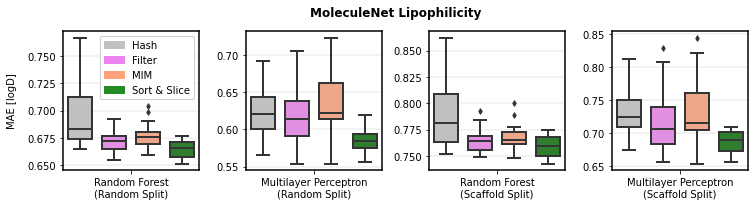

In [5]:
visualise_box_plots(dataset_name = "moleculenet_lipophilicity", # specify dataset name
                    metric = "MAE", # specify performance metric
                    y_unit = " [logD]", # specify unit for y-axis if applicable
                    show_legend = True, # show legend or not
                    show_x_ticks = True) # show text below subplots or not